In [60]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec

In [58]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-6.5, vmax=6.5)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    
#plot_generator(test[0,:,:])

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [4]:
z_test_tsne_track_31 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Randomized_Third_Day_3D_PCA_Latent_Space__31.npy")
z_test_tsne_track_31_4K = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/4K_Randomized_Third_Day_3D_PCA_Latent_Space__31.npy")



Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Randomized_Third_Day_Trackable/Randomized_Space_Time_W_Test.npy")
Test_Images_4K = np.load("/fast/gmooers/Preprocessed_Data/Randomized_Third_Day_Trackable/4K_Randomized_Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")

Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
Test_Images_4K = np.interp(Test_Images_4K, (0, 1), (Min_Scalar, Max_Scalar))

In [67]:
standard_ELBO = -1.0*np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/Anomalies/Randomized_ELBO_Data__31.npy")
four_k_ELBO = -1.0*np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/Anomalies/4K_Randomized_ELBO_Data__31.npy")

In [68]:
weird = np.argwhere(standard_ELBO > 0)
print(weird)

[[ 49604]
 [ 77779]
 [104001]
 [121907]]


In [77]:
weird_4K = np.argwhere(four_k_ELBO > 0)
print(weird_4K)

[[ 31966]
 [103210]]


/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


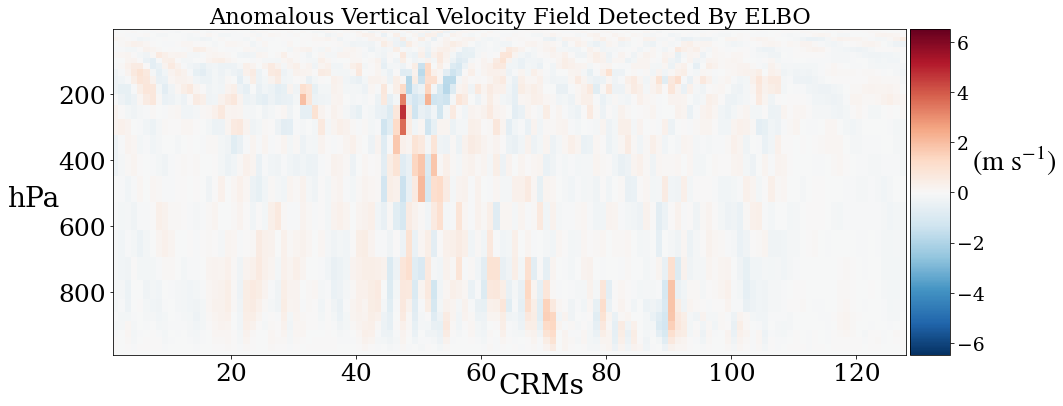

In [78]:
plot_generator_paper(Test_Images_4K[31966,:,:], Xs, Zs)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


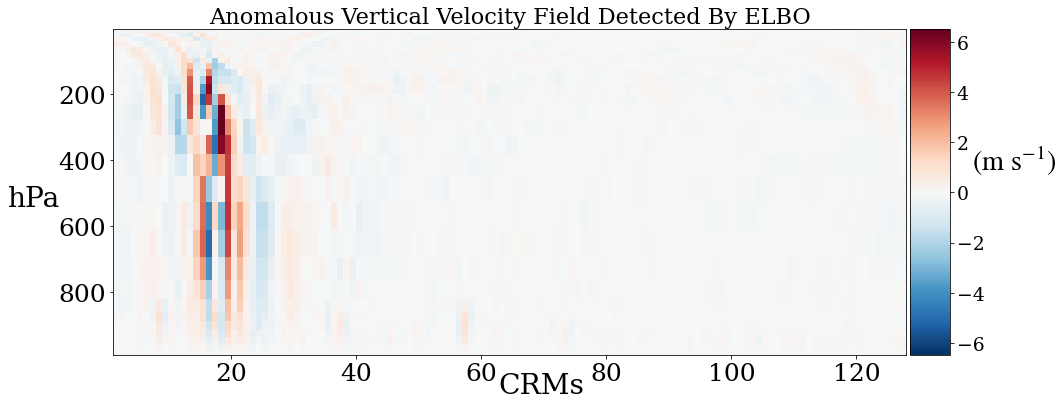

In [79]:
plot_generator_paper(Test_Images_4K[103210,:,:], Xs, Zs)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


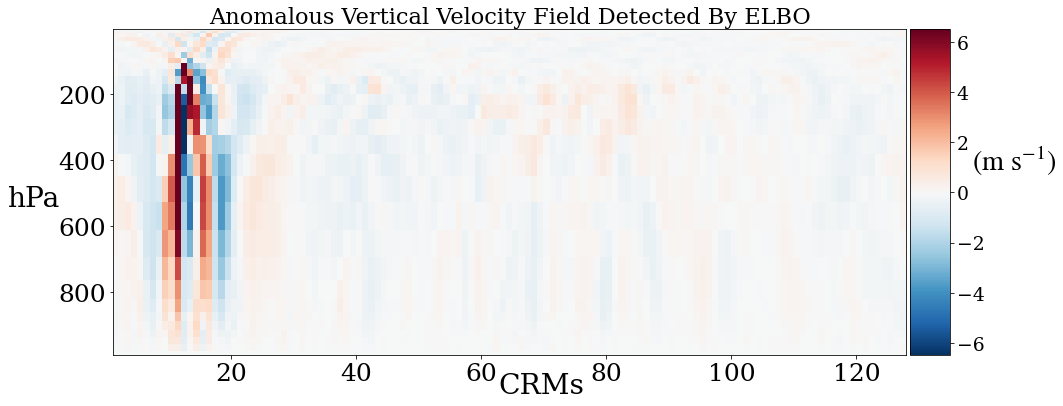

In [69]:
plot_generator_paper(Test_Images[49604,:,:], Xs, Zs)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


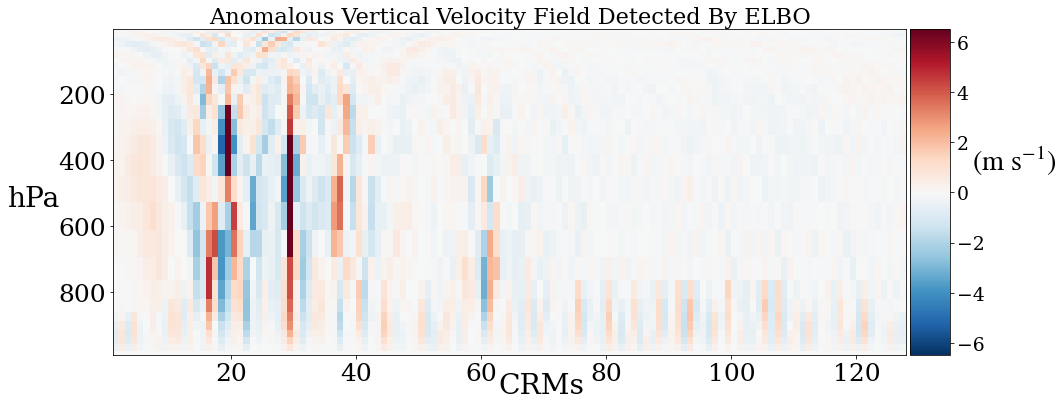

In [70]:
plot_generator_paper(Test_Images[77779,:,:], Xs, Zs)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


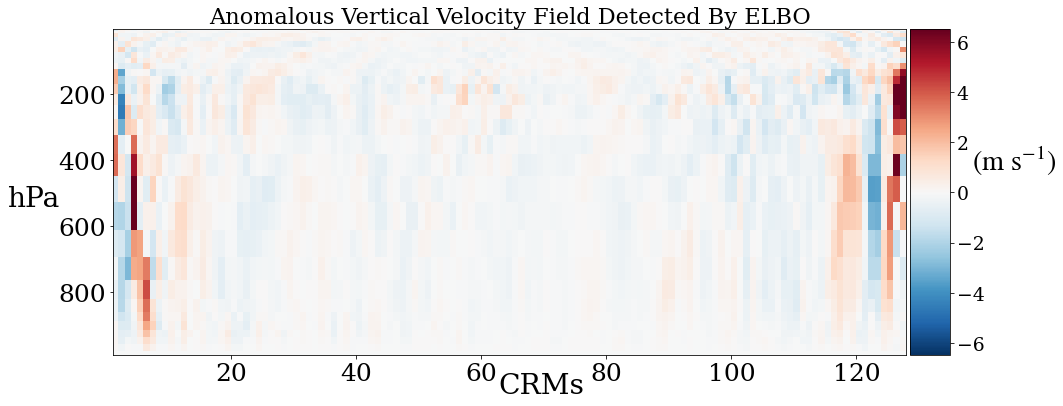

In [71]:
plot_generator_paper(Test_Images[104001,:,:], Xs, Zs)

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


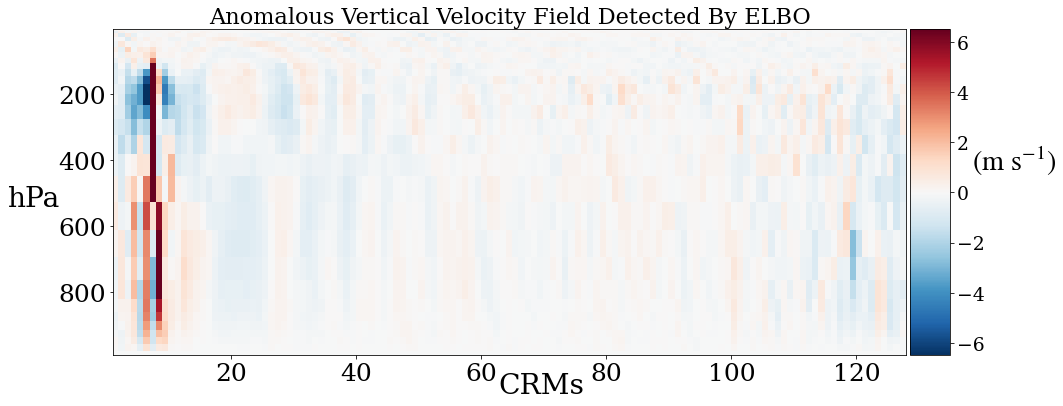

In [72]:
plot_generator_paper(Test_Images[121907,:,:], Xs, Zs)

In [80]:
standard_ELBO[standard_ELBO > 0] = -8000
four_k_ELBO[four_k_ELBO > 0] = -8000

In [81]:
min_val = min([np.min(standard_ELBO),np.min(four_k_ELBO)])
max_val = max([np.max(standard_ELBO),np.max(four_k_ELBO)])

# Histograms

In [97]:
Zero_K_95thPerc = np.percentile(standard_ELBO, 95)
print(Zero_K_95thPerc)

-9006.9988916172


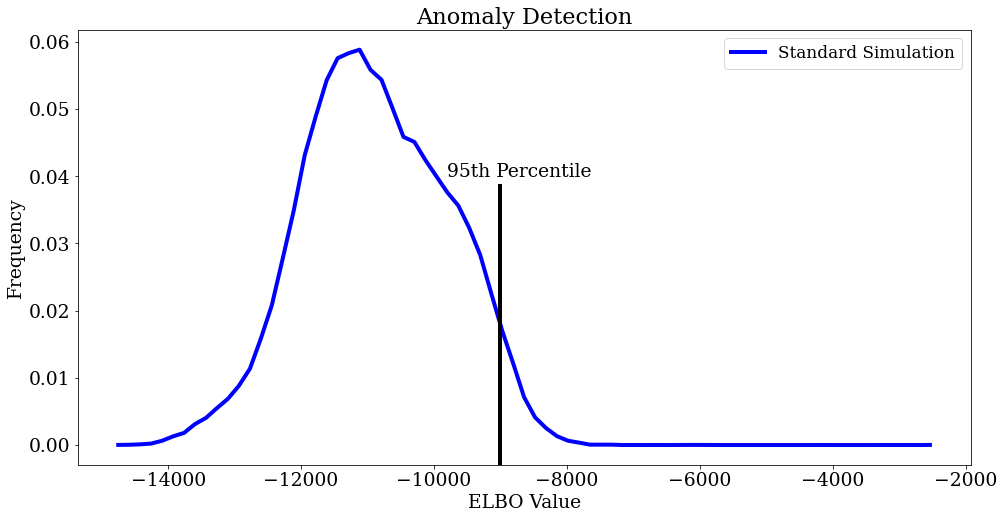

In [124]:
fig, ax = plt.subplots(figsize=(16,8))

shared_bins = np.histogram_bin_edges(standard_ELBO, bins=75)
freq, edges = np.histogram(standard_ELBO, bins = shared_bins, density=True)
freq_four, edges_four = np.histogram(four_k_ELBO, bins = shared_bins, density=True)
ax.plot(edges[:-1], freq/np.sum(freq),  label = "Standard Simulation", color = 'blue')
ax.axvline(x=Zero_K_95thPerc, ymin=0, ymax=0.64, c="black")
ax.legend(fontsize = fz*0.75)
ax.set_title("Anomaly Detection")
ax.set_ylabel("Frequency")
ax.set_xlabel("ELBO Value")
ax.text(Zero_K_95thPerc-800,0.04,'95th Percentile')
plt.savefig("Figures/0K_Anon_Histogram.png")
plt.savefig("Figures/0K_Anon_Histogram.pdf")
print(" ")

In [130]:
new_percentile_4K = scipy.stats.percentileofscore(four_k_ELBO, Zero_K_95thPerc)
#print(new_percentile_4K)

Text(0.5, 0, 'ELBO Value')

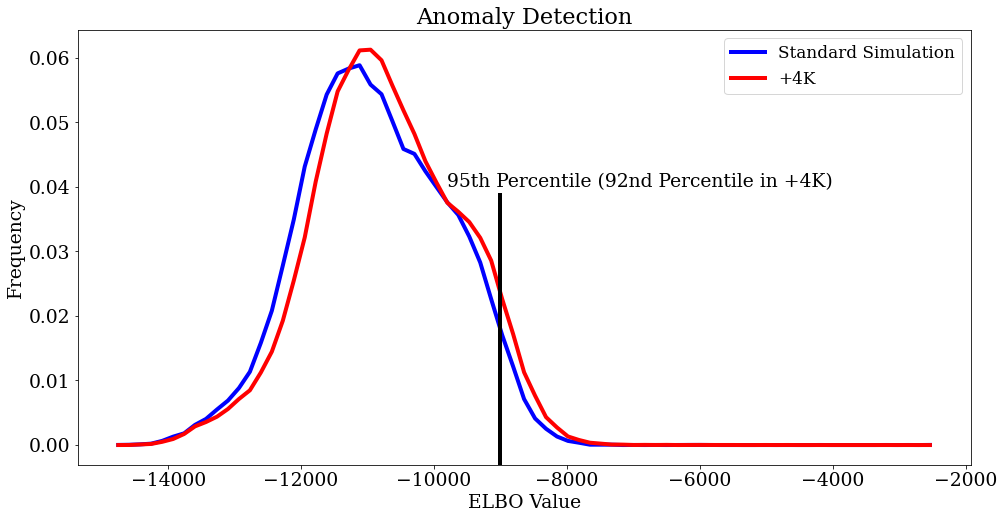

In [129]:
fig, ax = plt.subplots(figsize=(16,8))

shared_bins = np.histogram_bin_edges(standard_ELBO, bins=75)
freq, edges = np.histogram(standard_ELBO, bins = shared_bins, density=True)
freq_four, edges_four = np.histogram(four_k_ELBO, bins = shared_bins, density=True)
ax.plot(edges[:-1], freq/np.sum(freq),  label = "Standard Simulation", color = 'blue')
ax.plot(edges_four[:-1], freq_four/np.sum(freq_four),  label = "+4K", color = 'red')
ax.text(Zero_K_95thPerc-800,0.04,'95th Percentile (92nd Percentile in +4K)')
ax.axvline(x=Zero_K_95thPerc, ymin=0, ymax=0.62, c="black")
ax.legend(fontsize = fz*0.75)
ax.set_title("Anomaly Detection")
ax.set_ylabel("Frequency")
ax.set_xlabel("ELBO Value")
plt.savefig("Figures/4K_Anon_Histogram.png")
plt.savefig("Figures/4K_Anon_Histogram.pdf")
print(" ")

# 3D Latent Space Labels

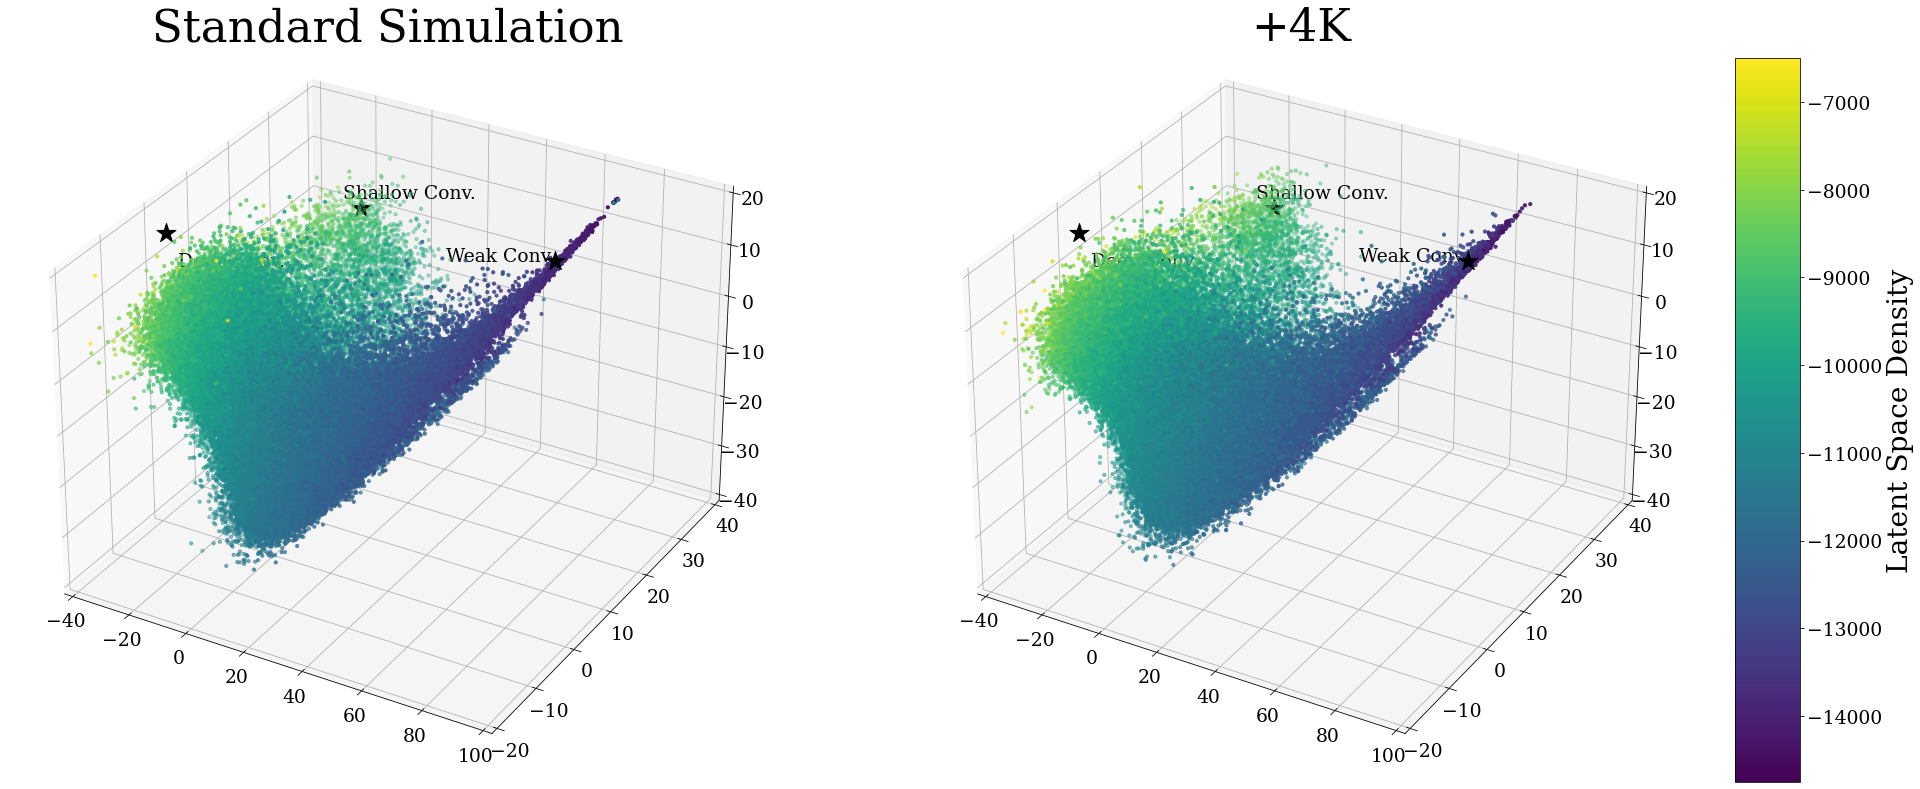

In [85]:
fig, ax = plt.subplots(1,2,figsize=(30,15))
gs=GridSpec(1,2)

ax1 = fig.add_subplot(gs[0], projection='3d')

cp = ax1.scatter(xs=z_test_tsne_track_31[:, 0], ys=z_test_tsne_track_31[:, 1], zs=z_test_tsne_track_31[:, 2], c=standard_ELBO, s=10.0, vmin = min_val, vmax=-6500)#, norm=matplotlib.colors.LogNorm())
ax1.set_title("Standard Simulation", fontsize = fz*2.0, y = 1.05)

ax1.set_ylim(-20,40)
ax1.set_xlim(-40,100)
ax1.set_zlim(-40,20)

ax1.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
ax1.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

ax1.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
ax1.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

ax1.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
ax1.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

ax2 = fig.add_subplot(gs[1], projection='3d')

cp = ax2.scatter(xs=z_test_tsne_track_31_4K[:, 0], ys=z_test_tsne_track_31_4K[:, 1], zs=z_test_tsne_track_31_4K[:, 2], c=four_k_ELBO,s=10.0, vmin = min_val, vmax=-6500)#, norm=matplotlib.colors.LogNorm())
ax2.set_title("+4K", fontsize = fz*2.0, y = 1.05)

ax2.set_ylim(-20,40)
ax2.set_xlim(-40,100)
ax2.set_zlim(-40,20)

ax2.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
ax2.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

ax2.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
ax2.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

ax2.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
ax2.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

p0 = ax1.get_position().get_points().flatten()
p2 = ax1.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.80, 0.15, p0[1]-0.12, 0.67])
cbar = fig.colorbar(cp, cax=ax_cbar)
cbar.set_label('ELBO Value', fontsize=fz*1.25)

fig.delaxes(ax[0])
fig.delaxes(ax[1])

for ii in range(360):
    ax1.view_init(elev=30, azim=ii)
    ax2.view_init(elev=30, azim=ii)
    if ii < 10:
        plt.savefig("Png_Storage/TD_Randomized_ELBO_Labels/00"+str(ii)+".png")
    if ii >= 10 and ii < 100:
        plt.savefig("Png_Storage/TD_Randomized_ELBO_Labels/0"+str(ii)+".png")
    if ii >= 100:
        plt.savefig("Png_Storage/TD_Randomized_ELBO_Labels/"+str(ii)+".png")

In [131]:
Zero_K_Anomalies = standard_ELBO[standard_ELBO >= Zero_K_95thPerc]
z_test_tsne_track_31_anon = z_test_tsne_track_31[standard_ELBO >= Zero_K_95thPerc]
Four_K_Anomalies = four_k_ELBO[four_k_ELBO >= Zero_K_95thPerc]
z_test_tsne_track_31_4K_anon = z_test_tsne_track_31_4K[four_k_ELBO >= Zero_K_95thPerc]

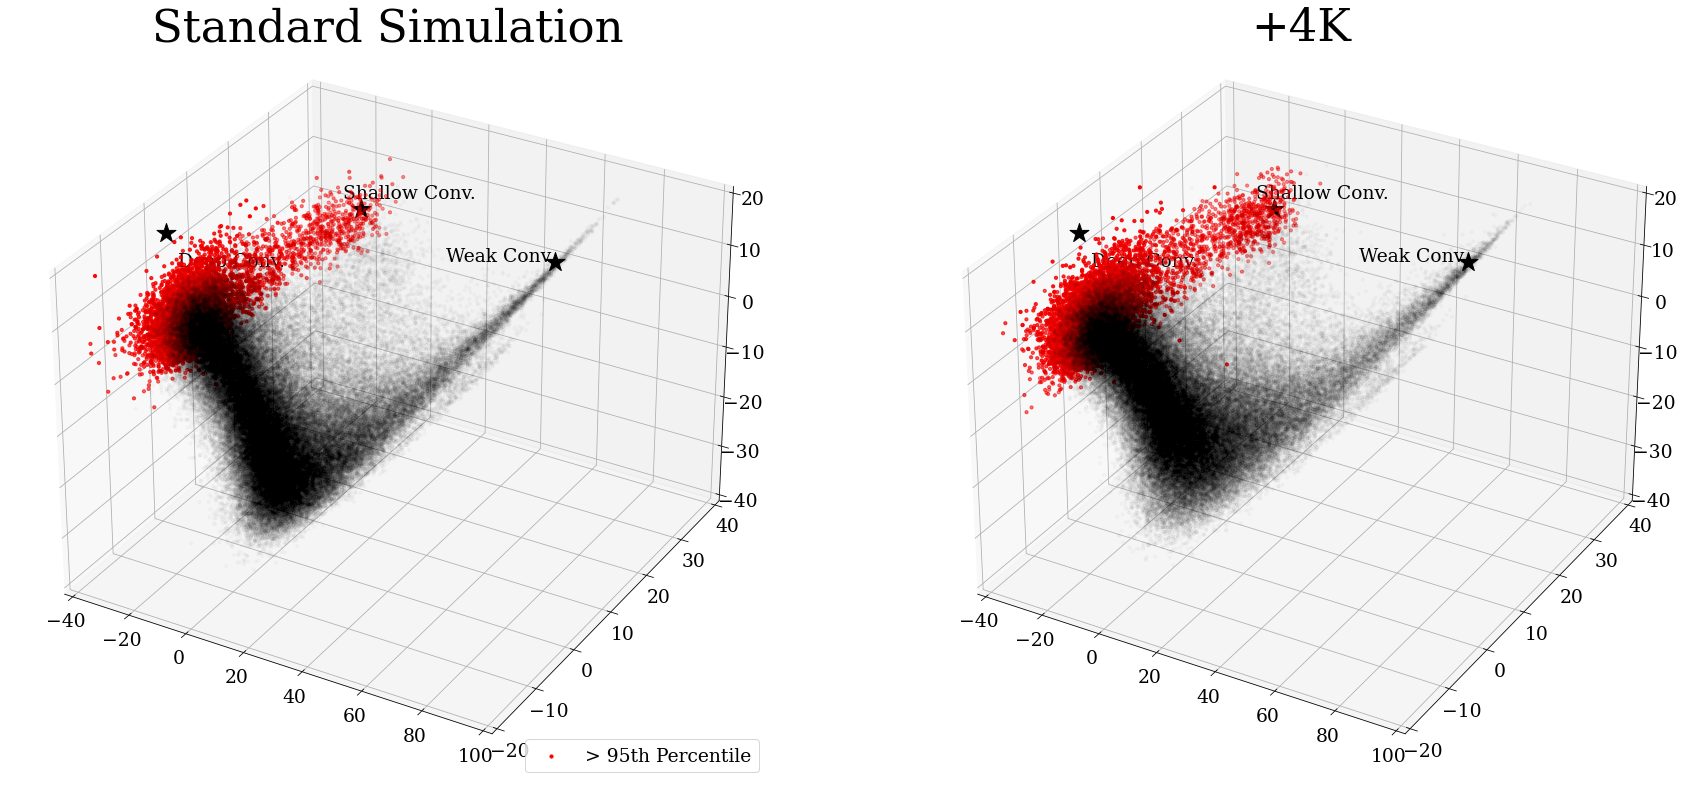

In [143]:
fig, ax = plt.subplots(1,2,figsize=(30,15))
gs=GridSpec(1,2)

ax1 = fig.add_subplot(gs[0], projection='3d')

ax1.scatter(xs=z_test_tsne_track_31[:, 0], ys=z_test_tsne_track_31[:, 1], zs=z_test_tsne_track_31[:, 2], c="black", s=10.0, alpha = 0.02)#, norm=matplotlib.colors.LogNorm())
cp = ax1.scatter(xs=z_test_tsne_track_31_anon[:, 0], ys=z_test_tsne_track_31_anon[:, 1], zs=z_test_tsne_track_31_anon[:, 2], c="red", s=10.0, label="> 95th Percentile")
ax1.legend(loc="lower right")
ax1.set_title("Standard Simulation", fontsize = fz*2.0, y = 1.05)

ax1.set_ylim(-20,40)
ax1.set_xlim(-40,100)
ax1.set_zlim(-40,20)

ax1.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
ax1.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

ax1.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
ax1.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

ax1.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
ax1.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

ax2 = fig.add_subplot(gs[1], projection='3d')

ax2.scatter(xs=z_test_tsne_track_31_4K[:, 0], ys=z_test_tsne_track_31_4K[:, 1], zs=z_test_tsne_track_31_4K[:, 2], c="black",s=10.0, alpha = 0.02)#, norm=matplotlib.colors.LogNorm())
cp = ax2.scatter(xs=z_test_tsne_track_31_4K_anon[:, 0], ys=z_test_tsne_track_31_4K_anon[:, 1], zs=z_test_tsne_track_31_4K_anon[:, 2], c="red",s=10.0)#, norm=matplotlib.colors.LogNorm())
ax2.set_title("+4K", fontsize = fz*2.0, y = 1.05)

ax2.set_ylim(-20,40)
ax2.set_xlim(-40,100)
ax2.set_zlim(-40,20)

ax2.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
ax2.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

ax2.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
ax2.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

ax2.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
ax2.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

fig.delaxes(ax[0])
fig.delaxes(ax[1])

for ii in range(360):
    ax1.view_init(elev=30, azim=ii)
    ax2.view_init(elev=30, azim=ii)
    if ii < 10:
        plt.savefig("Png_Storage/TD_Randomized_Anon_Labels/00"+str(ii)+".png")
    if ii >= 10 and ii < 100:
        plt.savefig("Png_Storage/TD_Randomized_Anon_Labels/0"+str(ii)+".png")
    if ii >= 100:
        plt.savefig("Png_Storage/TD_Randomized_Anon_Labels/"+str(ii)+".png")

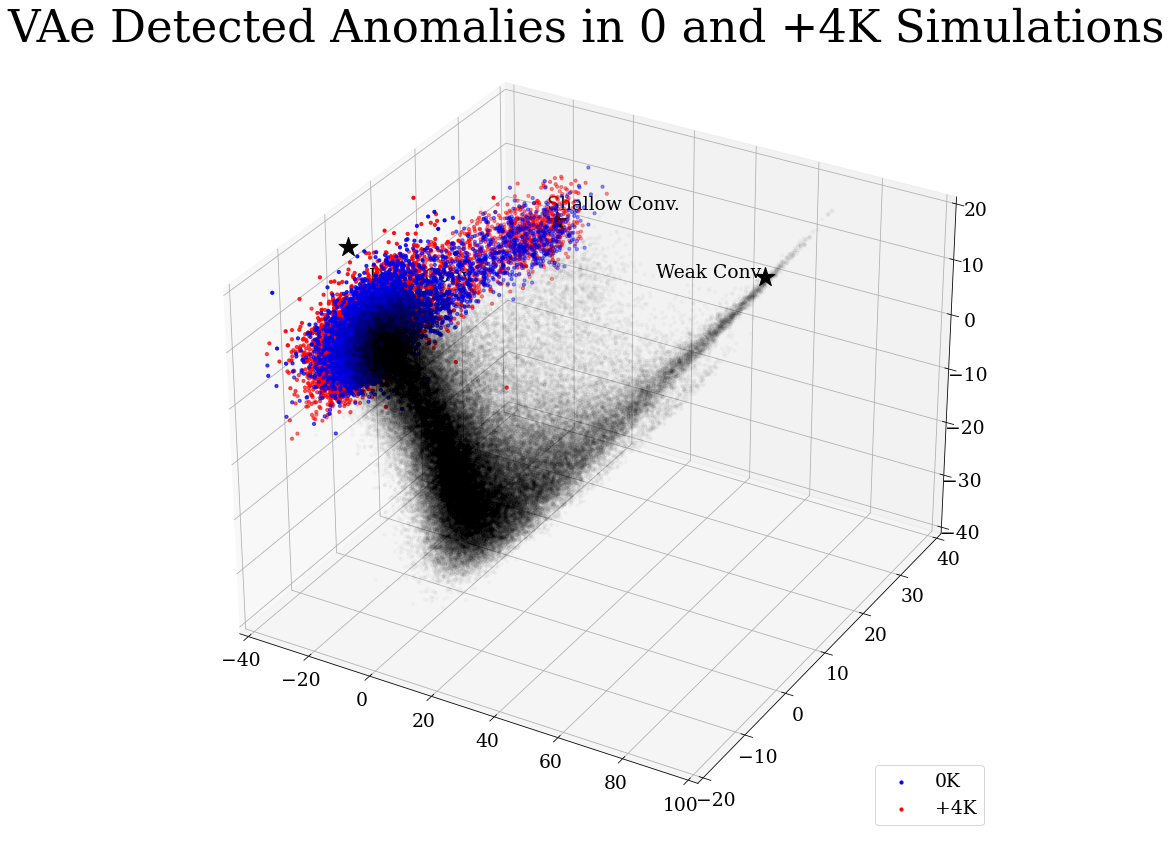

In [145]:
fig, ax = plt.subplots(1,1,figsize=(30,15))


ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(xs=z_test_tsne_track_31[:, 0], ys=z_test_tsne_track_31[:, 1], zs=z_test_tsne_track_31[:, 2], c="black", s=10.0, alpha = 0.02)#, norm=matplotlib.colors.LogNorm())
ax1.scatter(xs=z_test_tsne_track_31_anon[:, 0], ys=z_test_tsne_track_31_anon[:, 1], zs=z_test_tsne_track_31_anon[:, 2], c="blue", s=10.0, label="0K")
cp = ax1.scatter(xs=z_test_tsne_track_31_4K_anon[:, 0], ys=z_test_tsne_track_31_4K_anon[:, 1], zs=z_test_tsne_track_31_4K_anon[:, 2], c="red",s=10.0, label="+4K")#, norm=matplotlib.colors.LogNorm())

ax1.legend(loc="lower right")
ax1.set_title("VAE Detected Anomalies in 0 and +4K Simulations", fontsize = fz*2.0, y = 1.05)

ax1.set_ylim(-20,40)
ax1.set_xlim(-40,100)
ax1.set_zlim(-40,20)

ax1.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
ax1.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

ax1.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
ax1.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

ax1.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
ax1.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

fig.delaxes(ax)

for ii in range(360):
    ax1.view_init(elev=30, azim=ii)
    if ii < 10:
        plt.savefig("Png_Storage/TD_Randomized_Both_Anons/00"+str(ii)+".png")
    if ii >= 10 and ii < 100:
        plt.savefig("Png_Storage/TD_Randomized_Both_Anons/0"+str(ii)+".png")
    if ii >= 100:
        plt.savefig("Png_Storage/TD_Randomized_Both_Anons/"+str(ii)+".png")